# 音声に白色雑音を加える

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from IPython.display import Audio

In [2]:
IN_WAVE_FILE = "in.wav"  # モノラル音声（前提）
OUT_WAVE_FILE = "out_whitenoise.wav"

In [3]:
# 音声データ読み込み (fsがサンプリング周波数、dataは音声データ)
fs, speech_data = wavfile.read(IN_WAVE_FILE)

In [4]:
# 音声データの長さ
n_speech = len(speech_data)

# 雑音だけの区間の長さ
n_noise = 4000

# 全体の長さ
n_samples = n_noise + n_speech

In [5]:
# 白色雑音を生成
white_noise = np.random.normal(scale=0.04, size=n_samples)

# 2バイトのデータとして書き込むためにスケールを調整
white_noise = white_noise * np.iinfo(np.int16).max

# ゲインを調整
white_noise = 0.5 * white_noise

In [6]:
# 白色雑音を混ぜる
mixed_signal = white_noise  # 最初に雑音を入れる
mixed_signal[n_noise:] += speech_data  # 後から音声を足す

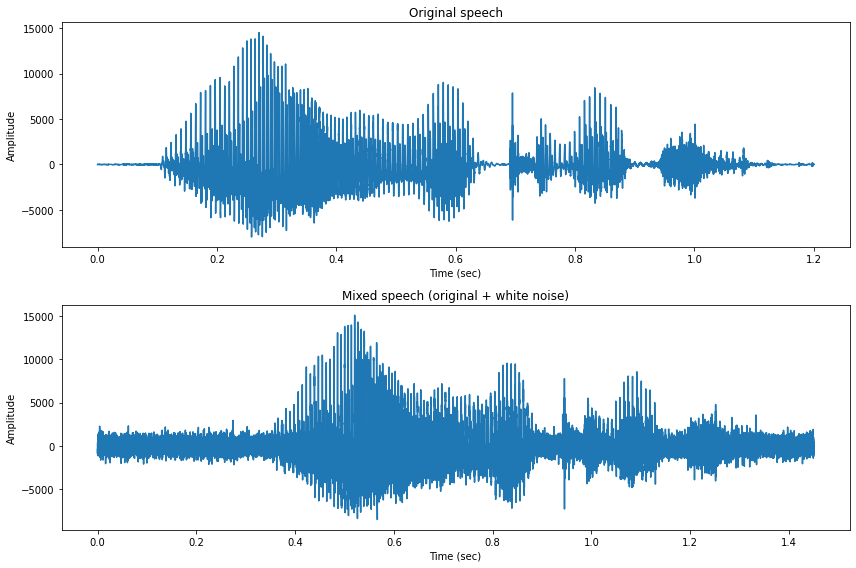

In [7]:
# プロット枠を確保 (10がヨコのサイズ、4はタテのサイズ)
fig = plt.figure(figsize=(12, 8))
axes1 = fig.add_subplot(2, 1, 1)
n_samples = len(speech_data)
time = np.arange(n_samples) / fs
axes1.plot(time, speech_data)  # 音声データのプロット
axes1.set_xlabel("Time (sec)")  # x軸のラベル
axes1.set_ylabel("Amplitude")  # y軸のラベル
axes1.set_title("Original speech")

axes2 = fig.add_subplot(2, 1, 2)
n_samples = len(mixed_signal)
time = np.arange(n_samples) / fs
axes2.plot(time, mixed_signal)  # 音声データのプロット
axes2.set_xlabel("Time (sec)")  # x軸のラベル
axes2.set_ylabel("Amplitude")  # y軸のラベル
axes2.set_title("Mixed speech (original + white noise)")

# 画像を画面表示
plt.tight_layout()

## 音声の再生（オリジナル）

In [8]:
Audio(speech_data, rate=fs)

## 音声の再生（白色雑音入り）

In [9]:
Audio(mixed_signal, rate=fs)